In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### part a

In [12]:
def prior(x):
    return 2*np.square(np.cos(4*np.pi*x))

def likelihood(x,S,n):
    return np.power(x,S)*np.power(1-x,n-S)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


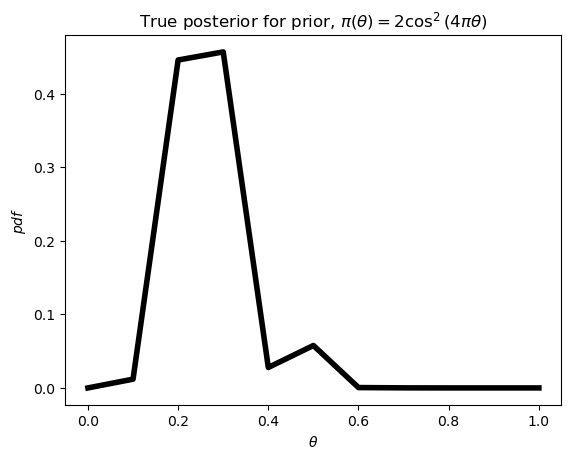

In [134]:
theta_grid = np.linspace(0,1,11)
print (theta_grid)
posterior = prior(theta_grid)*likelihood(theta_grid,5,20)
posterior = posterior/posterior.sum()

def get_true_posterior(ax=None):
    if not ax:
        plt.plot(theta_grid,posterior,lw=4,color="black",)
        plt.xlabel("$\\theta$")
        plt.ylabel("$pdf$")
        plt.title('True posterior for prior, $\pi(\\theta) = 2\cos^2(4 \pi \\theta)$')
    else:
        ax.plot(theta_grid,posterior,lw=4,color="black",label="True Posterior",alpha=0.7)
    
get_true_posterior()    

In [132]:
def MHalgo(T,func_prior,func_likelihood,fx_proposal,start,theta_grid):
    chain = np.zeros(T)
    acceptance_arr = np.zeros(T)
    histogram = np.zeros(11)
    histogram[6] = 1
    chain[0]=start
    for t in range(1,T):
        theta_old = chain[t-1]
        #propose new point
        theta_proposal = fx_proposal(theta_old)
        #get acceptance ratio
        posterior_proposal = func_likelihood(theta_proposal)*func_prior(theta_proposal)
        posterior_old = func_likelihood(theta_old)*func_prior(theta_old)
        A = (posterior_proposal)/(posterior_old) #for symmteric proposal
        #accept or reject
        u = np.random.uniform()
        if u<=min(1,A):
            chain[t]=theta_proposal
            acceptance_arr[t] = 1
        else:
            chain[t] = theta_old
        histogram[np.argmin(np.abs(theta_grid-chain[t]))]+=1  
    histogram = histogram/histogram.sum()
    print (f"AR:{np.mean(acceptance_arr):.4f}")
    return chain,np.mean(acceptance_arr),histogram

def proposal(old,sigma=0.2):
    return np.random.normal(loc=old,scale=sigma)

AR:0.3900
AR:0.3180
AR:0.3000
AR:0.3124


Text(0.5, 0.98, 'True posterior vs Metropolis hHastings for prior, $\\pi(\\theta) = 2\\cos^2(4 \\pi \\theta)$')

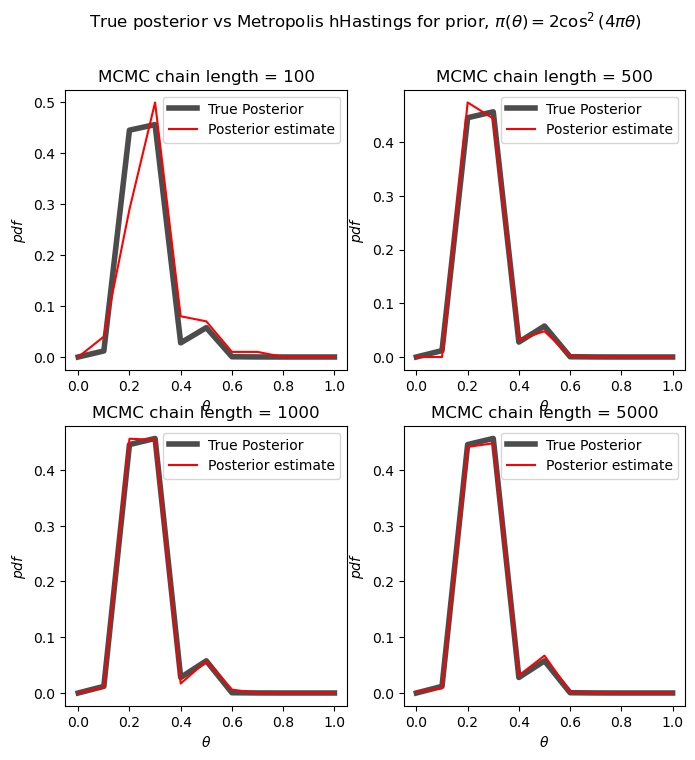

In [136]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
for T,ax in zip([100,500,1000,5000],axs.reshape(-1)):
    #get chain
    mh_chain,AR,hist_i = MHalgo(T,prior,lambda x: likelihood(x,5,20),proposal,0.7,theta_grid)
    #plot posterior
    get_true_posterior(ax)
    a,b = np.unique(mh_chain1,return_counts=True)
    ax.plot(theta_grid,hist_i,color="red",label="Posterior estimate")
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("$pdf$")
    ax.set_title(f"MCMC chain length = {T}")
    ax.legend()
fig.suptitle('True posterior vs Metropolis hHastings for prior, $\pi(\\theta) = 2\cos^2(4 \pi \\theta)$')    

### part b

In [144]:
mh_chain,AR,hist_i = MHalgo(10000,prior,lambda x: likelihood(x,5,20),proposal,0.7,theta_grid)
mh_chain_clean = mh_chain[1000:]

AR:0.3013


$$
E_{p(\theta|y)}(\theta)
$$

In [145]:
mh_chain_clean.mean()

0.2686250015253535

$$
E_{p(\theta|y)}((\theta-0.5)^2)
$$

In [146]:
np.mean(np.square(mh_chain_clean-0.5))

0.059311484099595836

### part c

0.09090909090909091
AR:0.5100
AR:0.5020
AR:0.4380
AR:0.4704


Text(0.5, 0.98, 'True posterior vs Metropolis hHastings for prior, $\\pi(\\theta) = U[0,1]$')

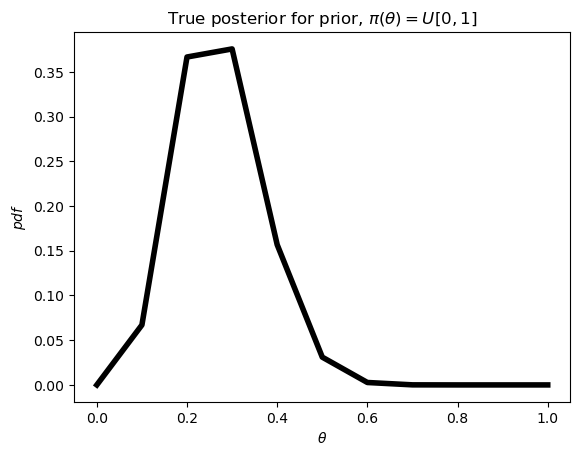

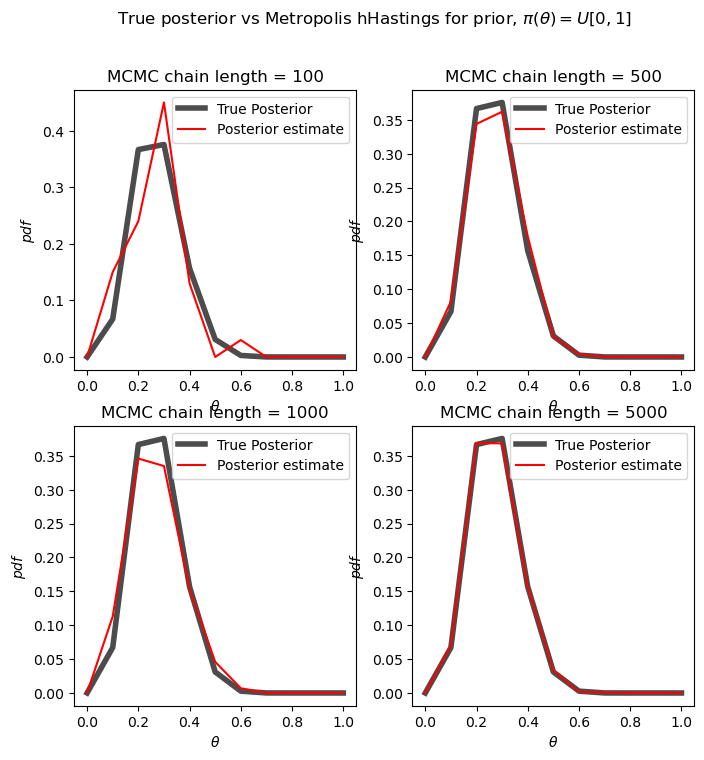

In [167]:
def prior_uniform(x):
    return np.where((0 <= x) & (x <= 1), 1, 0)

theta_grid = np.linspace(0,1,11)
posterior = likelihood(theta_grid,5,20)
posterior = posterior/posterior.sum()
print (posterior.mean())

def get_true_posterior(ax=None):
    if not ax:
        plt.plot(theta_grid,posterior,lw=4,color="black",)
        plt.xlabel("$\\theta$")
        plt.ylabel("$pdf$")
        plt.title('True posterior for prior, $\pi(\\theta) = U[0,1]$')
    else:
        ax.plot(theta_grid,posterior,lw=4,color="black",label="True Posterior",alpha=0.7)
    
get_true_posterior()    
    
fig,axs = plt.subplots(2,2,figsize=(8,8))
for T,ax in zip([100,500,1000,5000],axs.reshape(-1)):
    #get chain
    mh_chain,AR,hist_i = MHalgo(T,prior_uniform,lambda x: likelihood(x,5,20),proposal,0.7,theta_grid)
    #plot posterior
    get_true_posterior(ax)
    a,b = np.unique(mh_chain1,return_counts=True)
    ax.plot(theta_grid,hist_i,color="red",label="Posterior estimate")
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("$pdf$")
    ax.set_title(f"MCMC chain length = {T}")
    ax.legend()
fig.suptitle('True posterior vs Metropolis hHastings for prior, $\pi(\\theta) = U[0,1]$')

In [168]:
mh_chain,AR,hist_i = MHalgo(10000,prior_uniform,lambda x: likelihood(x,5,20),proposal,0.7,theta_grid)
mh_chain_clean = mh_chain[1000:]

AR:0.4732


$$
E_{p(\theta|y)}(\theta)
$$

In [169]:
mh_chain_clean.mean()

0.27470518557762214

$$
E_{p(\theta|y)}((\theta-0.5)^2)
$$

In [170]:
np.mean(np.square(mh_chain_clean-0.5))

0.05985823016547766

In [171]:
type(np.nan)

float